# Segmentaci√≥n de Clientes para Optimizar Estrategias de Marketing¬†Personalizadas

## 1. Importar Librer√≠as

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Cargar los datos

In [19]:
# Reemplaza el nombre del archivo por el tuyo
df = pd.read_csv("../data/output.csv")

# Ver los primeros registros
df.head()

passenger_email  total_tickets  avg_spent  \
0            hx.xxx@hotmail.com             49  80.051020   
1            jxxxxxx@icloud.com             42  61.904762   
2        Jxxxxxxxxxxx@gmail.com             38  86.105263   
3  gxxxxxxxxxxxxxxxxx@gmail.com             38  63.815789   
4        exxxxxx_xx@hotmail.com             37  68.243243   

   days_in_advance_avg  discount_rate  web_rate  last_purchase_days_ago  
0               0.0612            0.0    1.0000                      93  
1               0.1667            0.0    0.0476                     145  
2               0.9211            0.0    1.0000                     104  
3               0.3684            0.0    0.0000                     385  
4               3.9459            0.0    0.9730                      89

## 3. Descripci√≥n de la tabla

| Campo                     | Descripci√≥n                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| passenger_email           | Correo √∫nico del pasajero (solo para referencia, no se usa en K-Means)|     |
| total_tickets             | N√∫mero total de tickets comprados en los √∫ltimos 12 meses                    |
| avg_spent                 | Gasto promedio por ticket                                                   |
| days_in_advance_avg       | Promedio de d√≠as de anticipaci√≥n entre la compra y la fecha del viaje       |
| discount_rate             | Proporci√≥n de tickets comprados con descuento (0 a 1)                       |
| web_rate                  | Porcentaje de compras realizadas a trav√©s de la web                         |
| last_purchase_days_ago    | D√≠as transcurridos desde la √∫ltima compra hasta hoy                         |
| cluster                   | Etiqueta asignada por el modelo K-Means (0, 1, 2, ...)                      |


In [20]:
# Verificar informaci√≥n del DataFrame
df.describe()

total_tickets     avg_spent  days_in_advance_avg  discount_rate  \
count   18292.000000  18292.000000         18292.000000        18292.0   
mean        3.472338     98.288875             4.606713            0.0   
std         2.769072     43.529015             8.132991            0.0   
min         2.000000      5.000000             0.000000            0.0   
25%         2.000000     69.000000             1.000000            0.0   
50%         2.000000     85.000000             2.000000            0.0   
75%         4.000000    117.000000             4.666700            0.0   
max        49.000000    405.000000           112.000000            0.0   

           web_rate  last_purchase_days_ago  
count  18292.000000            18292.000000  
mean       0.843784              250.772906  
std        0.343252              111.316765  
min        0.000000               87.000000  
25%        1.000000              163.000000  
50%        1.000000              226.000000  
75%        1.000000              342.000000  
max        1.000000              481.000000

## 4. Escalar datos

In [21]:
# Eliminar columnas innecesarias
df_model = df.drop(columns=['passenger_email'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

El escalamiento de datos se aplica porque K-Means agrupa a los clientes seg√∫n la distancia entre ellos, y si las variables tienen diferentes escalas (por ejemplo, d√≥lares vs. porcentajes), las m√°s grandes dominan el resultado.

Escalar los datos permite que todas las variables tengan el mismo peso, asegurando que el modelo agrupe a los clientes de manera justa y equilibrada, sin que una caracter√≠stica influya m√°s que las dem√°s solo por tener valores num√©ricos m√°s altos.

## 5. Encontrar n√∫mero √≥ptimo de clusters

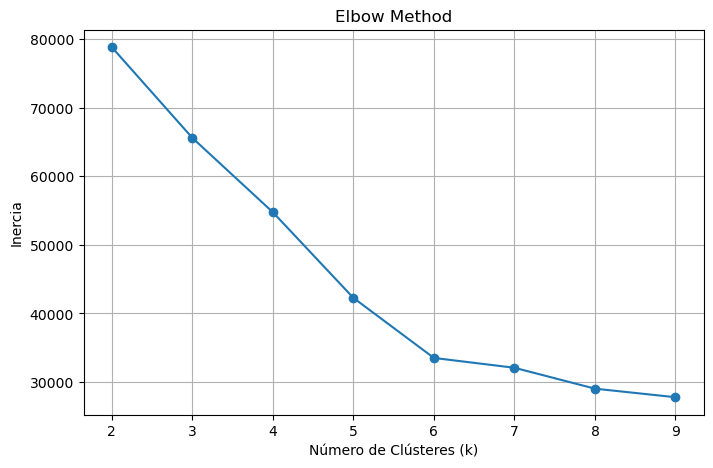

In [22]:
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gr√°fica
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('N√∫mero de Cl√∫steres (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

Se aplic√≥ Elbow Method, el cual eval√∫a la relaci√≥n entre el n√∫mero de cl√∫steres y la inercia del modelo. En el gr√°fico generado se observ√≥ un punto de inflexi√≥n en k=3, lo que indica que ese es el n√∫mero √≥ptimo de agrupamientos. A partir de 3, la reducci√≥n adicional de inercia al incrementar los cl√∫steres es m√≠nima, lo cual indica que agregar m√°s grupos no mejora significativamente la segmentaci√≥n y puede complicar la interpretaci√≥n. Elegir 3 cl√∫steres permite un equilibrio entre precisi√≥n del modelo y claridad en el an√°lisis.

## 6. Entrenar Modelo K-Means y Visualizar

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

Silhouette Score: 0.297


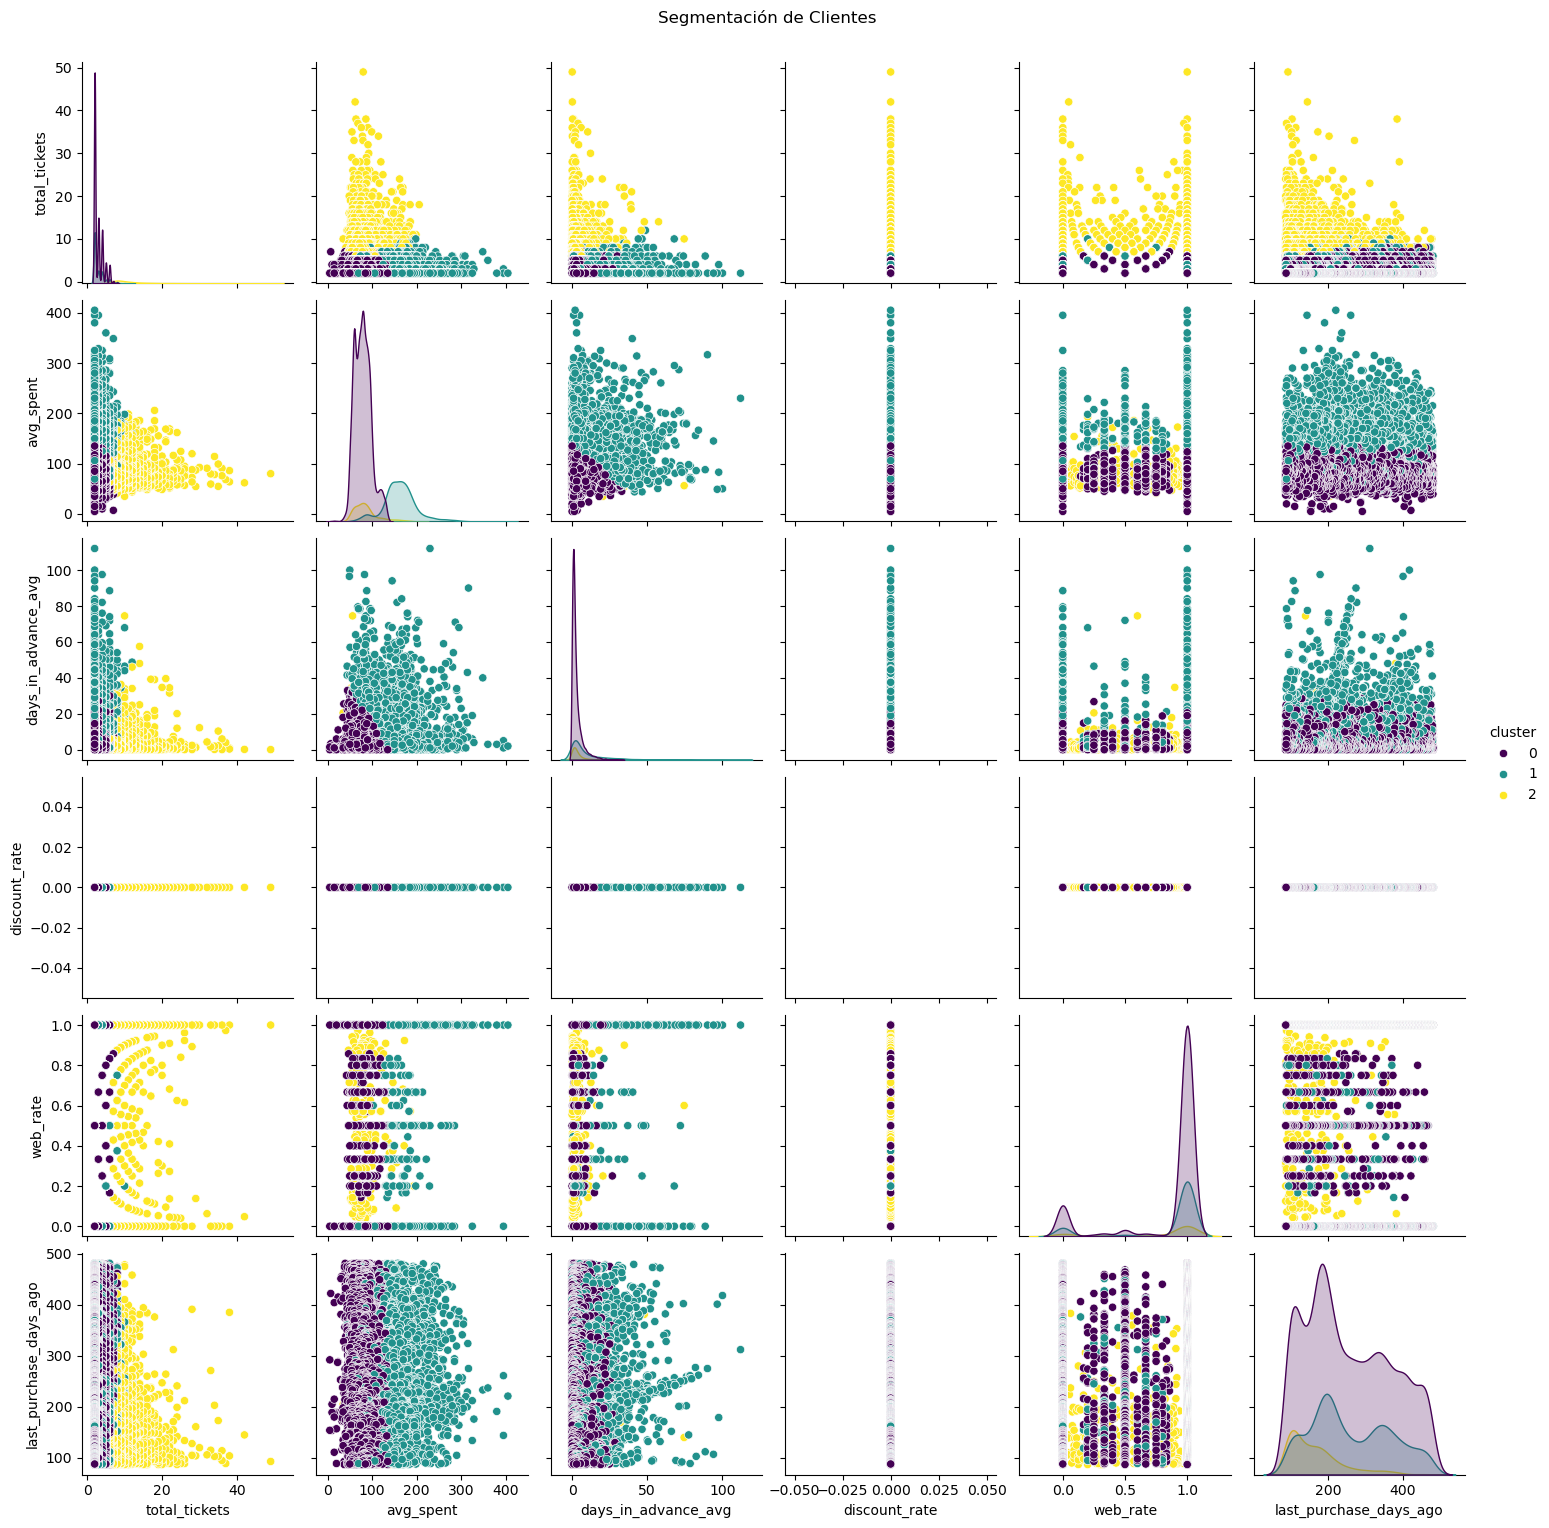

In [24]:
# Score de silueta
score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {score:.3f}")

# Visualizaci√≥n b√°sica en 2D (si usas 2 o 3 variables)
sns.pairplot(df, hue='cluster', palette='viridis')
plt.suptitle('Segmentaci√≥n de Clientes', y=1.02)
plt.show()

### üü£ Cl√∫ster 0 (p√∫rpura)
- **Frecuencia baja** (`total_tickets` alrededor de 1 a 3).
- **Gasto variable**, con algunos pasajeros gastando hasta m√°s de $300.
- **Alta anticipaci√≥n promedio** en la compra (`days_in_advance_avg`).
- **Preferencia por canal web** variable, pero tienden a extremos (0 o 1).
- **Compras m√°s recientes** (`last_purchase_days_ago` entre 100 y 300).
---

### üü¢ Cl√∫ster 1 (verde)
- **Frecuencia media** en la compra de tickets.
- **Gasto m√°s controlado y consistente**, concentrado entre $80‚Äì120.
- **Anticipaci√≥n m√°s baja** que el cl√∫ster p√∫rpura.
- **Uso de canal web** distribuido entre intermedio y bajo.
- **Compras recientes o semi-recientes**.
---

### üü° Cl√∫ster 2 (amarillo)
- **Frecuencia alta**, con varios pasajeros que compran m√°s de 10 tickets.
- **Gasto promedio m√°s bajo**, pero frecuente.
- **Compra con muy poca anticipaci√≥n**.
- **Alto uso del canal web**, especialmente valores cercanos a 1.
- **Compras muy recientes**.

### Resumen
- Las variables m√°s efectivas para distinguir cl√∫steres siguen siendo:
  - `total_tickets`
  - `avg_spent`
  - `last_purchase_days_ago`
  - `web_rate`
- La variable `discount_rate` permanece como poco √∫til: es casi constante y no separa grupos.
- Se confirman **3 segmentos bien definidos**: clientes espor√°dicos, promedio y frecuentes.

In [25]:
df.groupby('cluster').mean(numeric_only=True)

total_tickets   avg_spent  days_in_advance_avg  discount_rate  \
cluster                                                                  
0             2.875392   78.474646             2.812978            0.0   
1             2.907901  162.032665            10.214081            0.0   
2            10.982707   86.994258             4.099866            0.0   

         web_rate  last_purchase_days_ago  
cluster                                    
0        0.850585              255.968339  
1        0.847957              261.914564  
2        0.765344              165.727068

## Conclusi√≥n

El modelo K-Means permiti√≥ identificar tres segmentos clave de pasajeros:

- **Cl√∫ster 0**: clientes espor√°dicos, de bajo gasto y compras recientes; candidatos para campa√±as de reactivaci√≥n.
- **Cl√∫ster 1**: pasajeros planificadores y de alto gasto, pero inactivos; ideales para promociones exclusivas y fidelizaci√≥n.
- **Cl√∫ster 2**: usuarios frecuentes y activos, con gasto moderado; representan el p√∫blico m√°s valioso para retenci√≥n.

Estos resultados permiten a Tornado Bus Company personalizar sus estrategias de marketing y mejorar la toma de decisiones comerciales a partir del comportamiento real de sus clientes.